### Neural Network Implementation

In [174]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import tensorflow as tf


checkpoint = ModelCheckpoint(filepath = "weights.hdf5", verbose=1, save_best_only=True)

def get_model(activation = "relu"):
    
    model = Sequential()
    model.add(Dense(64, activation=activation, input_dim = inp))
    model.add(Dropout(.5))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(.5))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(.5))
    model.add(Dense(64, activation=activation))
    model.add(Dropout(.5))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation = "sigmoid"))

    model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
    return model

### This is the structure of the neural network. Unlike using the grid serach to tune the hyper parameters in the other models, here the hyper parameters are tuned manully by many trials.

In [75]:
import pandas as pd
train   = pd.read_csv("./train_processed.csv", sep=",",low_memory=False)

### Here I used the data set  processed using the methods included in the example of class as the training set.

In [76]:
test = pd.read_csv("./test_holdout_processed.csv", sep=",",low_memory=False)

In [77]:
train = train.drop("Unnamed: 0",axis = 1)

In [78]:
test = test.drop("Unnamed: 0",axis = 1)

In [79]:
train.head()

,client_id,pdays,emp_var_rate,euribor3m,nr_employed,pdays_999,woe_month_binned,woe_emp_var_rate_binned,woe_cons_price_idx_binned,woe_cons_conf_idx_binned,...,euribor3m_binned_woe,nr_employed_binned_woe,emp_var_rate_freq_bin_woe,euribor3m_freq_bin_woe,nr_employed_freq_bin_woe,emp_var_rate_width_bin_woe,cons_conf_idx_width_bin_woe,euribor3m_width_bin_woe,nr_employed_width_bin_woe,subscribe
0,2,999,1.1,4.858,5191.0,1,-33.396928,-94.568514,-123.938356,9.414245,...,-2.616464,-2.896025,-3.289431,-3.192275,-3.289431,-2.995732,-2.671493,-2.929108,-2.896025,0
1,5,999,-1.8,1.299,5099.1,1,-33.396928,44.145704,30.177277,-59.006784,...,-2.616464,-1.971674,-1.429056,-2.098587,-1.974348,-1.540039,-1.876394,-1.171029,-1.691018,0
2,8,999,-0.1,4.153,5195.8,1,-33.396928,44.145704,-33.246837,-59.006784,...,-2.616464,-2.896025,-2.363994,-2.098587,-2.363994,-2.370244,-2.756119,-2.639057,-2.896025,0
3,21,999,1.4,4.967,5228.1,1,-33.396928,-94.568514,-33.246837,-106.548634,...,-2.616464,-2.896025,-2.876386,-2.833213,-2.876386,-2.995732,-2.671493,-2.929108,-2.896025,0
4,22,999,1.4,4.964,5228.1,1,-33.396928,-94.568514,-33.246837,-106.548634,...,-2.616464,-2.896025,-2.876386,-2.833213,-2.876386,-2.995732,-2.671493,-2.929108,-2.896025,1


In [80]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = train[train.columns[~train.columns.isin(['client_id', 'subscribe'])]]
y = train[['subscribe']]
test_X = test[test.columns[~test.columns.isin(['client_id'])]]

X_scaled = StandardScaler().fit(X).transform(X)
test_X_sceled = StandardScaler().fit(test_X).transform(test_X)

X_scaled = pd.DataFrame(X_scaled) 
test_X_sceled = pd.DataFrame(test_X_sceled) 

X_scaled.columns = X.columns
test_X_sceled.columns = test_X.columns

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.3, stratify = y)

In [81]:
#Vectorize labels
y_train = np.asarray(y_train).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')

In [82]:
X_train.head()

,pdays,emp_var_rate,euribor3m,nr_employed,pdays_999,woe_month_binned,woe_emp_var_rate_binned,woe_cons_price_idx_binned,woe_cons_conf_idx_binned,woe_euribor3m_binned,...,cons_conf_idx_binned_woe,euribor3m_binned_woe,nr_employed_binned_woe,emp_var_rate_freq_bin_woe,euribor3m_freq_bin_woe,nr_employed_freq_bin_woe,emp_var_rate_width_bin_woe,cons_conf_idx_width_bin_woe,euribor3m_width_bin_woe,nr_employed_width_bin_woe
144,0.190444,-1.171691,-1.339415,-0.913808,0.190445,-0.344280,0.861225,0.696633,-0.523351,-0.420476,...,-0.523351,-0.420476,0.464356,1.059325,1.885206,0.465555,0.943773,0.552821,1.402320,0.777009
2440,0.190444,0.836282,0.774805,0.847984,0.190445,-0.344280,-0.791766,-0.225228,-0.523351,-0.420476,...,-0.523351,-0.420476,-0.595889,-0.591047,-0.566121,-0.520394,-0.739178,-0.622115,-0.736384,-0.623353
1086,0.190444,-1.171691,-1.700757,-2.148429,0.190445,3.686872,0.861225,-0.225228,2.697187,2.378256,...,2.697187,2.378256,2.362456,1.059325,1.885206,2.277232,0.943773,-0.509091,1.402320,2.643909
1852,0.190444,-1.171691,-1.262108,-0.913808,0.190445,1.322965,0.861225,0.696633,1.337156,-0.420476,...,1.337156,-0.420476,0.464356,1.059325,0.296220,0.465555,0.943773,0.552821,1.402320,0.777009
1677,0.190444,0.648034,0.714677,0.341298,0.190445,-0.344280,-0.791766,-1.543418,0.426963,-0.420476,...,0.426963,-0.420476,-0.595889,-1.062038,-0.987605,-0.971862,-0.739178,-0.509091,-0.736384,-0.623353


In [83]:
test_X_sceled.head()

,pdays,emp_var_rate,euribor3m,nr_employed,pdays_999,woe_month_binned,woe_emp_var_rate_binned,woe_cons_price_idx_binned,woe_cons_conf_idx_binned,woe_euribor3m_binned,...,cons_conf_idx_binned_woe,euribor3m_binned_woe,nr_employed_binned_woe,emp_var_rate_freq_bin_woe,euribor3m_freq_bin_woe,nr_employed_freq_bin_woe,emp_var_rate_width_bin_woe,cons_conf_idx_width_bin_woe,euribor3m_width_bin_woe,nr_employed_width_bin_woe
0,0.191382,-0.125321,0.319244,0.393092,0.191383,-0.331078,0.889709,-0.215606,-0.514479,-0.414026,...,-0.514479,-0.414026,-0.587133,0.010182,-0.978973,0.052269,0.002073,-0.60997,-0.724467,-0.613897
1,0.191382,0.825518,0.763970,0.834533,0.191383,-0.331078,-0.782095,-0.215606,-1.186626,-0.414026,...,-1.186626,-0.414026,-0.587133,-0.581444,-0.555281,-0.512382,-0.729234,-0.49414,-0.724467,-0.613897
2,0.191382,-1.202938,-1.722926,-2.163988,0.191383,3.869049,0.889709,-0.215606,2.763749,2.415308,...,2.763749,2.415308,2.395251,1.089695,1.908887,2.308195,0.972729,-0.49414,1.422093,2.664775
3,0.191382,0.825518,0.759937,0.834533,0.191383,-0.331078,-0.782095,-0.215606,-0.514479,-0.414026,...,-0.514479,-0.414026,-0.587133,-0.581444,-0.527184,-0.512382,-0.729234,-0.60997,-0.724467,-0.613897
4,0.191382,0.635350,0.704635,0.327491,0.191383,-0.331078,-0.782095,-1.557505,0.452858,-0.414026,...,0.452858,-0.414026,-0.587133,-1.058361,-0.978973,-0.967555,-0.729234,-0.49414,-0.724467,-0.613897


### In order to implement the neural network using Keras, I converted the format of our dataset using np.array

In [85]:
X_train = np.array(X_train)

In [86]:
y_train = np.array(y_train)

In [87]:
X_valid = np.array(X_valid)

In [88]:
y_valid = np.array(y_valid)

In [89]:
test_X_sceled = np.array(test_X_sceled)

In [178]:
model = get_model()

history = model.fit(X_train, y_train, batch_size = 32, epochs = 16, validation_data=[X_valid, y_valid], callbacks = [checkpoint])

Train on 2940 samples, validate on 1260 samples
Epoch 1/16
2940/2940 [==============================] - 0s - loss: 0.4581 - acc: 0.8660 - val_loss: 0.3213 - val_acc: 0.8857
Epoch 2/16
2940/2940 [==============================] - 0s - loss: 0.3779 - acc: 0.8816 - val_loss: 0.3291 - val_acc: 0.8857
Epoch 3/16
2940/2940 [==============================] - 0s - loss: 0.3444 - acc: 0.8854 - val_loss: 0.3015 - val_acc: 0.8857
Epoch 4/16
2940/2940 [==============================] - 0s - loss: 0.3352 - acc: 0.8864 - val_loss: 0.3097 - val_acc: 0.8857
Epoch 5/16
2940/2940 [==============================] - 0s - loss: 0.3349 - acc: 0.8861 - val_loss: 0.3084 - val_acc: 0.8857
Epoch 6/16
2940/2940 [==============================] - 0s - loss: 0.3279 - acc: 0.8867 - val_loss: 0.3268 - val_acc: 0.8857
Epoch 7/16
2940/2940 [==============================] - 0s - loss: 0.3236 - acc: 0.8864 - val_loss: 0.3058 - val_acc: 0.8857
Epoch 8/16
2940/2940 [==============================] - 0s - loss: 0.3178 - a

### Batch size and epochs are also tuned manually by many trials. To measure the performance of the network, I used accuracy, loss and AUC as metrics. I firstly set the epochs to 100 and I found the model overfit the model a lot, then I gradually decrease it. Meabwhile, for the batchsize, 32 might be very likely to overfit the model, but actually 32 is like the best size when I was tuning it. When it was settd to 64 or 128, the accuracy actually decreased.

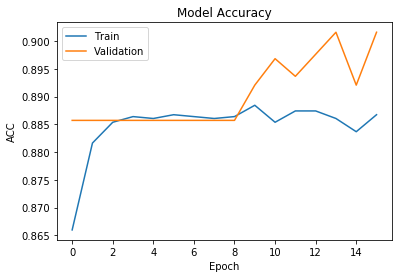

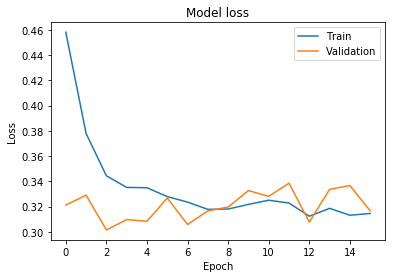

In [179]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('ACC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [180]:
y_pred = model.predict(X_valid)

In [181]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, f1_score 

In [182]:
y_pred = model.predict(X_valid)
probabilities = pd.DataFrame(model.predict_proba(X_valid))
auc           = roc_auc_score(np.array(y_valid),np.array(probabilities))

  32/1260 [..............................] - ETA: 0s

In [183]:
auc

0.78951675129430499

### Make predictions on the hold out data set.

In [184]:
final_pred = model.predict(test_X_sceled)

In [185]:
final_pred = pd.DataFrame(final_pred) 

In [186]:
final_preds = pd.DataFrame() 

In [187]:
final_preds["client_id"] = test.iloc[:,0]

In [188]:
final_preds["subscribe"] = final_pred

In [189]:
final_preds

,client_id,subscribe
0,1,0.136767
1,10,0.130955
2,11,0.485104
3,12,0.138140
4,13,0.118340
5,17,0.138130
6,20,0.147907
7,23,0.137718
8,25,0.147818
9,28,0.142681


In [191]:
final_preds.to_csv(r'./target.csv', index = False)